### Selection

The below code illustrates the evolution of allele frequencies in 1-locus 2-allele cases for various combinations of fitness values.\
The below block has some general functions that are used later and the subsequent blocks plot the graphs that show the evolution of allele frequencies and genotype frequencies.

The allele frequency in the next generation is given by

$$p' = \frac {p}{\overline w}w_1^*$$

where $w_1^* = pw_{11} + (1-p)w_{12}$ and $\overline w = p^2w_{11} + 2p(1-p)w_{12} + (1-p)^2w_{22}$

In [71]:
import numpy as np 
import matplotlib.pyplot as plt 


def next_gen_p(p, w11, w12, w22):
    w_1_star = p*w11 + (1-p)*w12
    w_bar = (p**2)*w11 + 2*p*(1-p)*w12 + ((1-p)**2)*w22 

    return (p*w_1_star)/w_bar 


def fitnesses(h, s):
    w11 = 1
    w12 = 1 - h*s
    w22 = 1 - s
    return w11, w12, w22


def evolve(p_0, w11, w12, w22, GENERATIONS):
    p = np.zeros(GENERATIONS)
    p[0] = p_0
    for i in range(1, GENERATIONS):
        p[i] = next_gen_p(p[i-1], w11, w12, w22)


    return p


def genotype_freqs(p):
    return p**2, 2*p*(1-p), (1-p)**2



Selection against recessive phenotype:

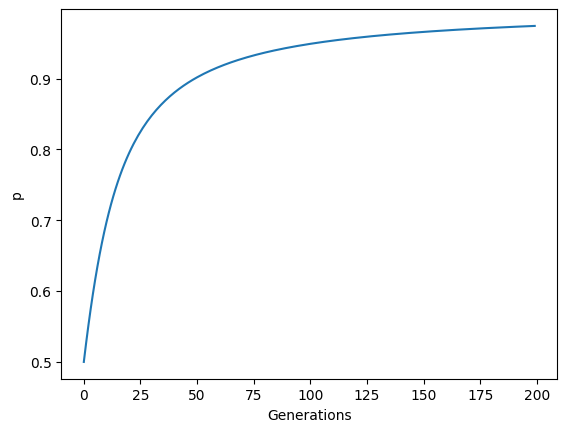

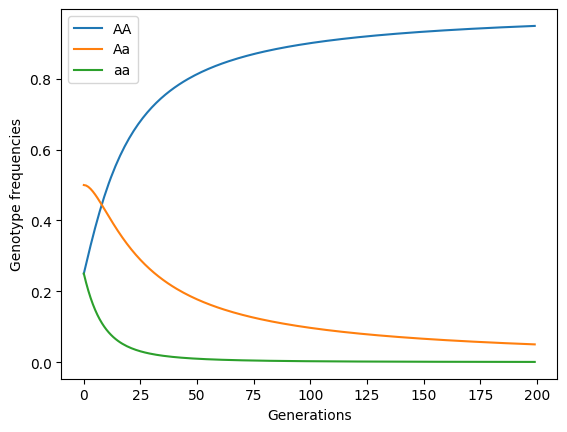

In [72]:
p = evolve(0.5, 1, 1, 0.8, 200)

plt.plot(np.arange(0, 200), p)
plt.xlabel('Generations')
plt.ylabel('p')

# Genotype frequencies
plt.figure()
plt.plot(np.arange(0, 200), genotype_freqs(p)[0], label='AA')
plt.plot(np.arange(0, 200), genotype_freqs(p)[1], label='Aa')
plt.plot(np.arange(0, 200), genotype_freqs(p)[2], label='aa')
plt.xlabel('Generations')
plt.ylabel('Genotype frequencies')
plt.legend()

Selection against a dominant phenotype:

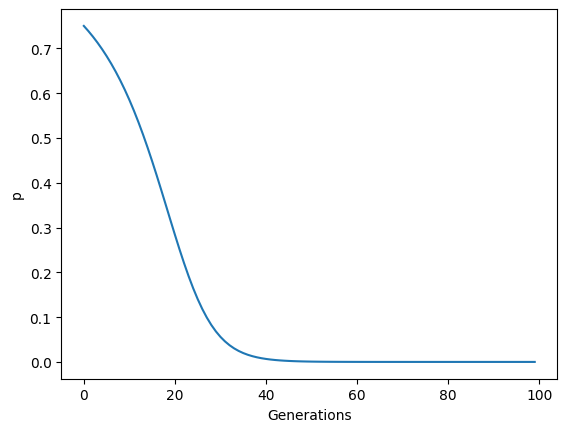

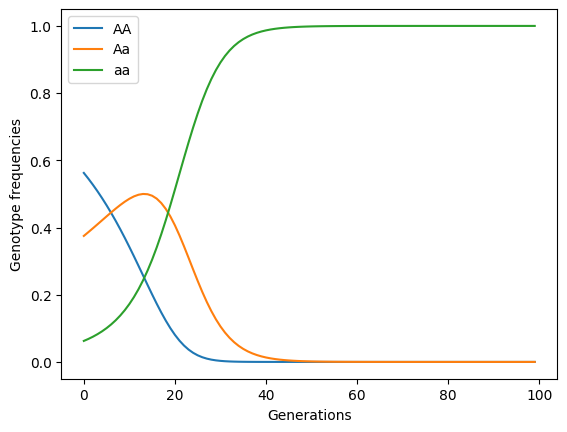

In [74]:
p = evolve(0.75, 0.8, 0.8, 1, 100)
plt.plot(np.arange(0, 100), p)
plt.xlabel('Generations')
plt.ylabel('p')

# Genotype frequencies
plt.figure()
plt.plot(np.arange(0, 100), genotype_freqs(p)[0], label='AA')
plt.plot(np.arange(0, 100), genotype_freqs(p)[1], label='Aa')
plt.plot(np.arange(0, 100), genotype_freqs(p)[2], label='aa')
plt.xlabel('Generations')
plt.ylabel('Genotype frequencies')
plt.legend()

General case of dominance:
The fittest allele is fixed in the population.

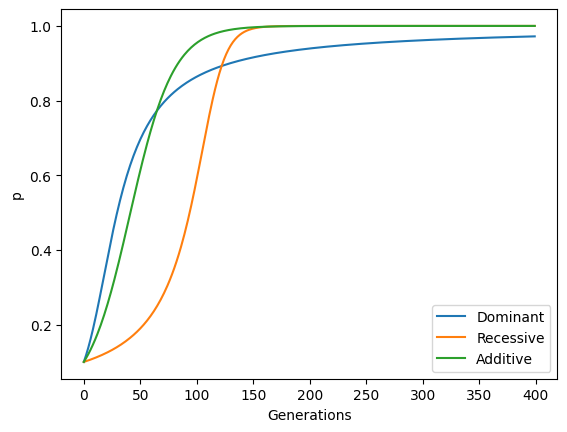

In [75]:
# Dominant
w11, w12, w22 = fitnesses(0, 0.1)
dominant = evolve(0.1, w11, w12, w22, GENERATIONS = 400)

# Recessive
w11, w12, w22 = fitnesses(1, 0.1)
recessive = evolve(0.1, w11, w12, w22, GENERATIONS = 400)

# Additive
w11, w12, w22 = fitnesses(0.5, 0.1)
additive = evolve(0.1, w11, w12, w22, GENERATIONS = 400)

plt.plot(np.arange(0, 400), dominant, label='Dominant')
plt.plot(np.arange(0, 400), recessive, label='Recessive')
plt.plot(np.arange(0, 400), additive, label='Additive')
plt.xlabel('Generations')
plt.ylabel('p')
plt.legend()


Underdominance: Heterozygotes are less fit than homozygotes. Initial conditions matter.

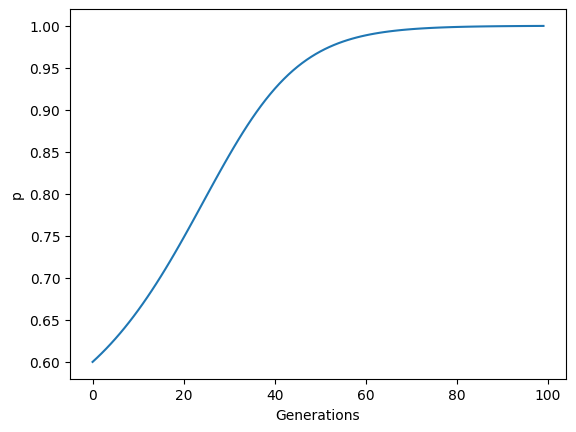

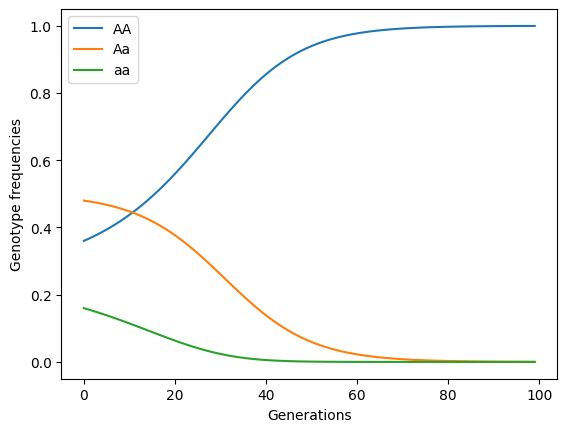

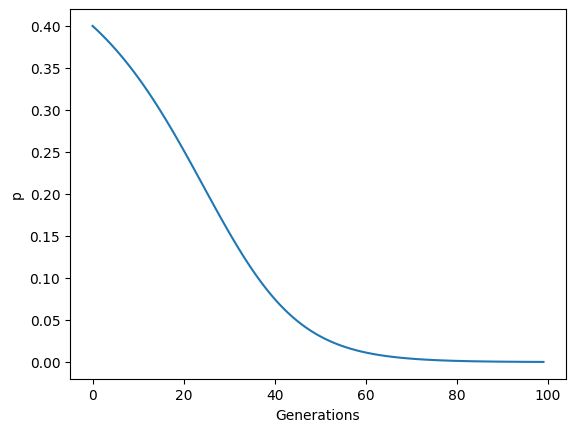

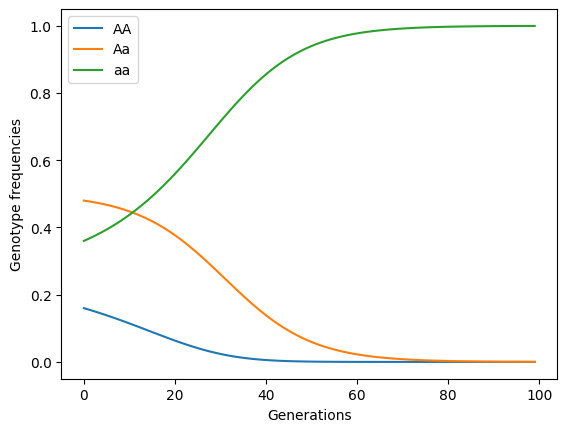

In [76]:
p = evolve(0.6, 1, 0.9, 1, 100)
p1 = evolve(0.4, 1, 0.9, 1, 100)

# Allele A getting fixed
plt.plot(np.arange(0, 100), p)
plt.xlabel('Generations')
plt.ylabel('p')

# Genotype frequencies
plt.figure()
plt.plot(np.arange(0, 100), genotype_freqs(p)[0], label='AA')
plt.plot(np.arange(0, 100), genotype_freqs(p)[1], label='Aa')
plt.plot(np.arange(0, 100), genotype_freqs(p)[2], label='aa')
plt.xlabel('Generations')
plt.ylabel('Genotype frequencies')
plt.legend()


# Allele a getting fixed
plt.figure()
plt.plot(np.arange(0, 100), p1)
plt.xlabel('Generations')
plt.ylabel('p')

# Genotype frequencies
plt.figure()
plt.plot(np.arange(0, 100), genotype_freqs(p1)[0], label='AA')
plt.plot(np.arange(0, 100), genotype_freqs(p1)[1], label='Aa')
plt.plot(np.arange(0, 100), genotype_freqs(p1)[2], label='aa')
plt.xlabel('Generations')
plt.ylabel('Genotype frequencies')
plt.legend()


Overdominance:

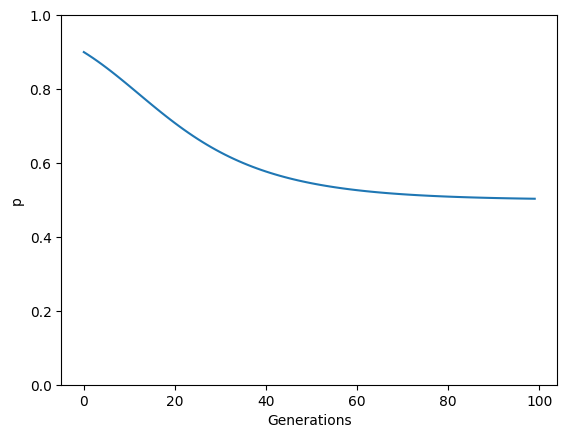

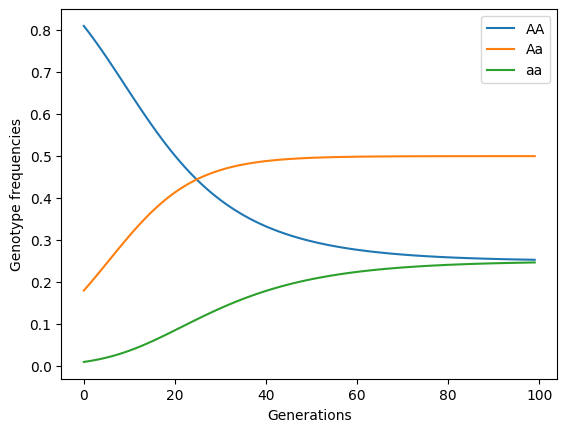

In [77]:
p = evolve(0.9, 0.9, 1, 0.9, 100)

plt.plot(np.arange(0, 100), p)
plt.ylim(0, 1)
plt.xlabel('Generations')
plt.ylabel('p')

# Genotype frequencies
plt.figure()
plt.plot(np.arange(0, 100), genotype_freqs(p)[0], label='AA')
plt.plot(np.arange(0, 100), genotype_freqs(p)[1], label='Aa')
plt.plot(np.arange(0, 100), genotype_freqs(p)[2], label='aa')
plt.xlabel('Generations')
plt.ylabel('Genotype frequencies')
plt.legend()
